<a href="https://colab.research.google.com/github/PaulPawelec/DataMining/blob/main/Netflix_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import numpy as np

In [9]:
df = pd.read_csv('Netflix TV Shows and Movies.csv')

In [10]:
df.head()

,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
0,0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,tt0075314,8.3,795222.0
1,1,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,tt0071853,8.2,530877.0
2,2,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,tt0079470,8.0,392419.0
3,3,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,tt0070047,8.1,391942.0
4,4,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,tt0063929,8.8,72895.0


In [11]:
df.describe()

,index,release_year,runtime,imdb_score,imdb_votes
count,5283.000000,5283.000000,5283.000000,5283.000000,5.267000e+03
mean,2641.000000,2015.879992,79.199886,6.533447,2.340719e+04
std,1525.215067,7.346098,38.915974,1.160932,8.713432e+04
min,0.000000,1953.000000,0.000000,1.500000,5.000000e+00
25%,1320.500000,2015.000000,45.000000,5.800000,5.210000e+02
50%,2641.000000,2018.000000,87.000000,6.600000,2.279000e+03
75%,3961.500000,2020.000000,106.000000,7.400000,1.014400e+04
max,5282.000000,2022.000000,235.000000,9.600000,2.268288e+06


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5283 entries, 0 to 5282
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              5283 non-null   int64  
 1   id                 5283 non-null   object 
 2   title              5283 non-null   object 
 3   type               5283 non-null   object 
 4   description        5278 non-null   object 
 5   release_year       5283 non-null   int64  
 6   age_certification  2998 non-null   object 
 7   runtime            5283 non-null   int64  
 8   imdb_id            5283 non-null   object 
 9   imdb_score         5283 non-null   float64
 10  imdb_votes         5267 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 454.1+ KB


In [13]:
df.isna().sum()

index                   0
id                      0
title                   0
type                    0
description             5
release_year            0
age_certification    2285
runtime                 0
imdb_id                 0
imdb_score              0
imdb_votes             16
dtype: int64

In [14]:
column_to_remove = ['index', 'id', 'imdb_id']
df.drop(column_to_remove, inplace = True, axis = 1)
df.head()

,title,type,description,release_year,age_certification,runtime,imdb_score,imdb_votes
0,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,8.3,795222.0
1,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,8.2,530877.0
2,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,8.0,392419.0
3,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,8.1,391942.0
4,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,8.8,72895.0


In [15]:
df.description = df.description.fillna("No description")

In [16]:
df.isna().sum()

title                   0
type                    0
description             0
release_year            0
age_certification    2285
runtime                 0
imdb_score              0
imdb_votes             16
dtype: int64

In [17]:
df.age_certification.unique()

array(['R', 'PG', 'TV-14', 'G', 'PG-13', nan, 'TV-MA', 'TV-PG', 'TV-Y',
       'TV-G', 'TV-Y7', 'NC-17'], dtype=object)

In [18]:
df.age_certification = df.age_certification.fillna("Unknown")

In [19]:
df.isna().sum()

title                 0
type                  0
description           0
release_year          0
age_certification     0
runtime               0
imdb_score            0
imdb_votes           16
dtype: int64

In [20]:
med = df.imdb_votes.median()
df.imdb_votes = df.imdb_votes.fillna(med)

In [21]:
df.isna().sum()

title                0
type                 0
description          0
release_year         0
age_certification    0
runtime              0
imdb_score           0
imdb_votes           0
dtype: int64

### Visualization

Counting TV Shows and movies.

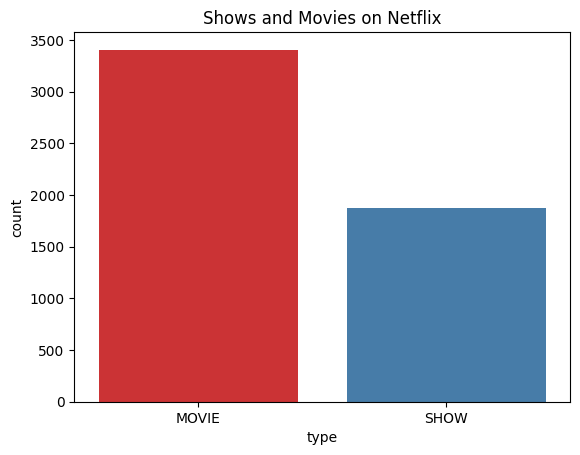

In [50]:
sns.countplot(data=df, x='type', palette='Set1')
plt.title('Shows and Movies on Netflix')
plt.show()

Max runtime

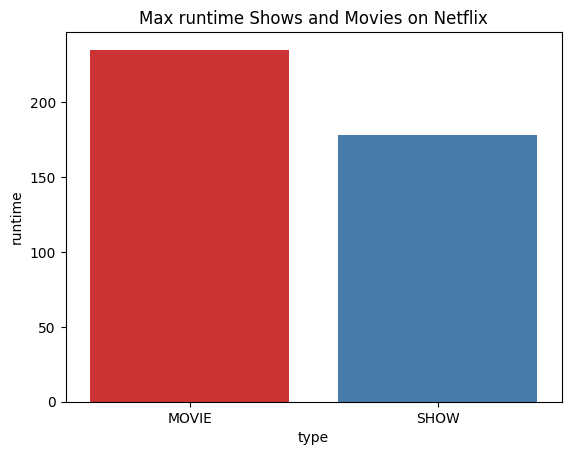

In [75]:
sns.barplot(data=df, x='type', y='runtime', estimator = np.max, errorbar=('ci', 0), palette='Set1')
plt.title('Max runtime Shows and Movies on Netflix')
plt.show()

Sum runtime

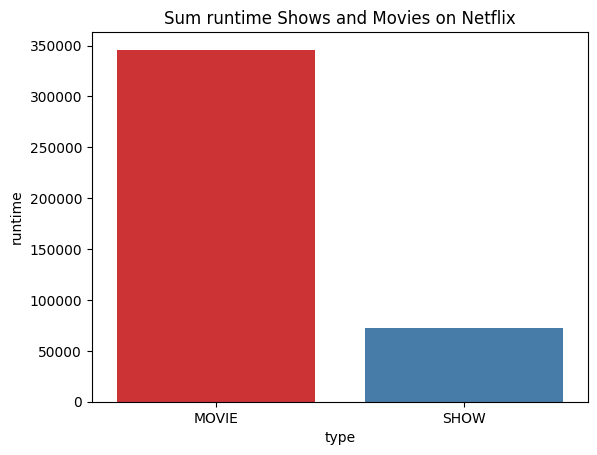

In [76]:
sns.barplot(data=df, x='type', y='runtime', estimator = np.sum, errorbar=('ci', 0), palette='Set1')
plt.title('Sum runtime Shows and Movies on Netflix')
plt.show()

Average rating and number of votes

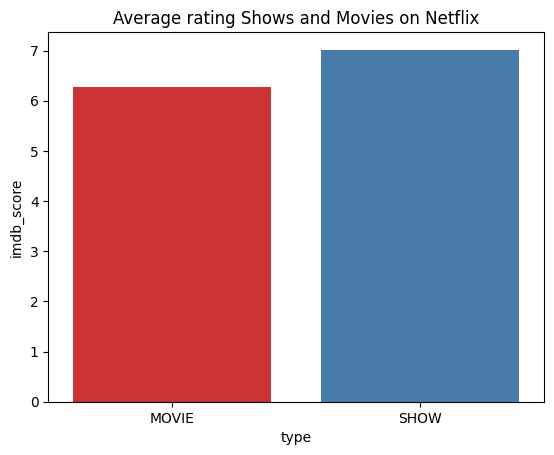

In [74]:
sns.barplot(data=df, x='type', y='imdb_score', estimator = np.mean, errorbar=('ci', 0), palette='Set1')
plt.title('Average rating Shows and Movies on Netflix')
plt.show()

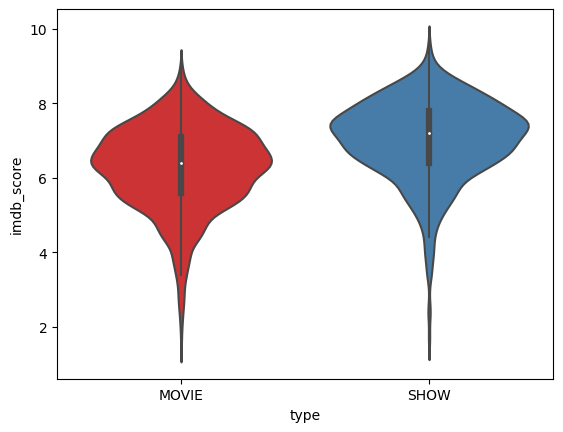

In [73]:
sns.violinplot(data=df, x='type', y='imdb_score', palette='Set1')
plt.show()

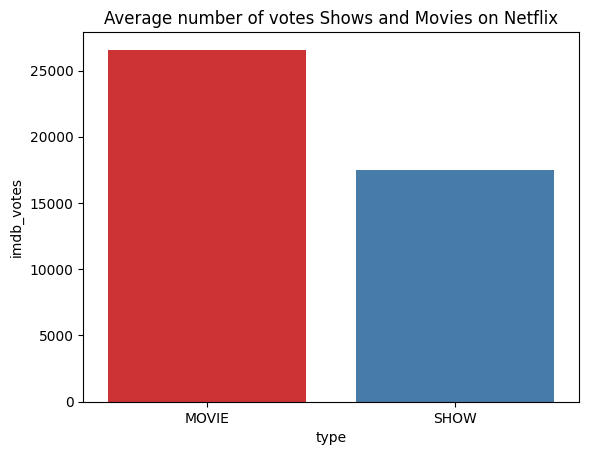

In [72]:
sns.barplot(data=df, x='type', y='imdb_votes', estimator = np.mean, errorbar=('ci', 0), palette='Set1')
plt.title('Average number of votes Shows and Movies on Netflix')
plt.show()

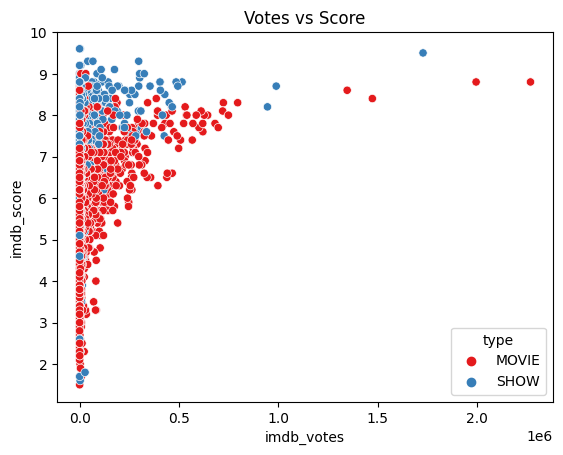

In [71]:
sns.scatterplot(data=df, x='imdb_votes', y='imdb_score', hue='type', palette='Set1')
plt.title('Votes vs Score')
plt.show()